In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

unzip:  cannot find or open /content/drive/MyDrive/Flowers-Dataset.zip, /content/drive/MyDrive/Flowers-Dataset.zip.zip or /content/drive/MyDrive/Flowers-Dataset.zip.ZIP.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

NameError: ignored

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

In [ ]:
xtest = test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

NameError: ignored

**Create Model**

In [ ]:
model = Sequential()

**Convolution Layer**

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**MaxPooling**

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [ ]:
model.add(Flatten())

NameError: ignored

**Dense Layer**

In [ ]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(150,activation='relu')) #hiddenlayer 2

**Output**

In [ ]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Fit The Model**

In [ ]:
model.fit_generator(xtrain,steps_per_epoch=108,epochs=30,validation_data=xtest,validation_steps=27)

Epoch 1/30
 44/108 [===========>..................] - ETA: 39s - loss: 1.6634 - accuracy: 0.3741

108/108 [==============================] - 37s 335ms/step - loss: 1.6634 - accuracy: 0.3741 - val_loss: 1.2147 - val_accuracy: 0.4874


**Save The Model**

In [ ]:
model.save('Flowers.h5')

**Test The Model**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img('/content/flowers/sunflower/10386503264_e05387e1f7_m.jpg',target_size=(64,64))

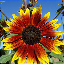

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [ ]:
pred_prob=model.predict(x)

In [ ]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]

In [ ]:
pred_id=pred_prob.argmax(axis=1)[0]
pred_id

4

In [ ]:
print("Predicted flower is",str(class_name[pred_id]))

Predicted flower is Tulip
